
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
""" 
import required packages
"""

import os
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import polsartools as pst
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module='pyproj')


In [2]:
""" 

Function to display images

"""

def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax

    num_images = len(filenames)

    if num_images == 1:
        # Single image case
        data = pst.read_rst(filenames[0])
        data[data==0]=np.nan
        vmin, vmax = compute_vmin_vmax(data)

        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filenames[0]))
        fig.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple image case
        ncols = min(max_cols, num_images)
        nrows = int(np.ceil(num_images / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
        axes = np.array(axes).reshape(-1)  # Flatten in case it's a 2D grid

        for i, filename in enumerate(filenames):
            data = pst.read_rst(filename)
            data[data==0]=np.nan
            vmin, vmax = compute_vmin_vmax(data)
            ax = axes[i]
            im = ax.imshow(data, vmin=vmin, vmax=vmax)
            ax.set_title(os.path.basename(filename))
            fig.colorbar(im, ax=ax)

        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


#### 1. Extract multilooked C2 matrix from NISAR RSLC data
##### using **`polsartools.nisar_rslc`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/nisar.html#rslc-nisar-rslc) or run `print(polsartools.nisar_rslc.__.doc__)`


In [3]:

inFile =r"../data/NISAR/RSLC_DP.h5"

# The following function extracts a multilooked C2 matrix from NISAR dual-polarimetric RSLC data.
# Provide path to the NISAR RSLC .h5 file.

pst.nisar_rslc(inFile,azlks=22,rglks=10) # 5m,10m SLC spacing

Detected L-band ['HH' 'HV'] 
Extracting C2HX matrix elements...


Processing chunks:   0%|          | 0/738 [00:00<?, ?it/s]

Processing chunks:   0%|          | 1/738 [00:04<51:23,  4.18s/it]

Processing chunks:   1%|          | 9/738 [00:04<04:15,  2.86it/s]

Processing chunks:   2%|▏         | 15/738 [00:04<02:14,  5.37it/s]

Processing chunks:   3%|▎         | 21/738 [00:04<01:23,  8.63it/s]

Processing chunks:   4%|▎         | 27/738 [00:04<00:56, 12.65it/s]

Processing chunks:   5%|▍         | 35/738 [00:04<00:38, 18.25it/s]

Processing chunks:   6%|▌         | 41/738 [00:04<00:30, 22.74it/s]

Processing chunks:   7%|▋         | 51/738 [00:05<00:22, 30.96it/s]

Processing chunks:   8%|▊         | 57/738 [00:05<00:21, 31.34it/s]

Processing chunks:   9%|▉         | 66/738 [00:05<00:18, 37.11it/s]

Processing chunks:  10%|▉         | 71/738 [00:05<00:20, 32.30it/s]

Processing chunks:  10%|█         | 76/738 [00:05<00:19, 34.11it/s]

Processing chunks:  11%|█         | 81/738 [00:05<00:18, 36.45it/s]

Processing chunks:  12%|█▏        | 86/738 [00:05<00:16, 39.03it/s]

Processing chunks:  12%|█▏        | 91/738 [00:06<00:17, 36.67it/s]

Processing chunks:  14%|█▎        | 100/738 [00:06<00:13, 47.71it/s]

Processing chunks:  14%|█▍        | 107/738 [00:06<00:13, 45.49it/s]

Processing chunks:  16%|█▌        | 115/738 [00:06<00:12, 51.14it/s]

Processing chunks:  16%|█▋        | 121/738 [00:06<00:11, 52.10it/s]

Processing chunks:  17%|█▋        | 127/738 [00:06<00:14, 40.90it/s]

Processing chunks:  19%|█▊        | 138/738 [00:06<00:11, 53.38it/s]

Processing chunks:  20%|█▉        | 145/738 [00:07<00:13, 43.10it/s]

Processing chunks:  21%|██        | 156/738 [00:07<00:10, 55.73it/s]

Processing chunks:  22%|██▏       | 163/738 [00:07<00:12, 44.70it/s]

Processing chunks:  24%|██▎       | 174/738 [00:07<00:10, 54.33it/s]

Processing chunks:  25%|██▍       | 181/738 [00:07<00:13, 42.09it/s]

Processing chunks:  26%|██▌       | 190/738 [00:08<00:10, 49.92it/s]

Processing chunks:  27%|██▋       | 197/738 [00:08<00:13, 39.48it/s]

Processing chunks:  28%|██▊       | 204/738 [00:08<00:12, 42.30it/s]

Processing chunks:  29%|██▊       | 211/738 [00:08<00:12, 43.61it/s]

Processing chunks:  29%|██▉       | 217/738 [00:08<00:13, 38.18it/s]

Processing chunks:  31%|███       | 226/738 [00:09<00:11, 44.43it/s]

Processing chunks:  31%|███▏      | 231/738 [00:09<00:11, 44.48it/s]

Processing chunks:  32%|███▏      | 236/738 [00:09<00:13, 38.27it/s]

Processing chunks:  33%|███▎      | 244/738 [00:09<00:11, 43.14it/s]

Processing chunks:  34%|███▎      | 249/738 [00:09<00:11, 41.56it/s]

Processing chunks:  34%|███▍      | 254/738 [00:09<00:11, 41.48it/s]

Processing chunks:  36%|███▌      | 264/738 [00:09<00:09, 51.45it/s]

Processing chunks:  37%|███▋      | 270/738 [00:10<00:10, 46.75it/s]

Processing chunks:  38%|███▊      | 279/738 [00:10<00:08, 55.82it/s]

Processing chunks:  39%|███▊      | 285/738 [00:10<00:09, 47.50it/s]

Processing chunks:  39%|███▉      | 291/738 [00:10<00:09, 48.25it/s]

Processing chunks:  41%|████      | 300/738 [00:10<00:08, 54.58it/s]

Processing chunks:  41%|████▏     | 306/738 [00:10<00:08, 48.66it/s]

Processing chunks:  42%|████▏     | 313/738 [00:10<00:08, 52.91it/s]

Processing chunks:  43%|████▎     | 319/738 [00:10<00:08, 50.81it/s]

Processing chunks:  44%|████▍     | 325/738 [00:11<00:09, 43.32it/s]

Processing chunks:  45%|████▌     | 334/738 [00:11<00:07, 52.72it/s]

Processing chunks:  46%|████▌     | 340/738 [00:11<00:08, 49.21it/s]

Processing chunks:  47%|████▋     | 346/738 [00:11<00:08, 43.89it/s]

Processing chunks:  48%|████▊     | 352/738 [00:11<00:08, 46.45it/s]

Processing chunks:  48%|████▊     | 357/738 [00:11<00:08, 45.84it/s]

Processing chunks:  49%|████▉     | 362/738 [00:11<00:10, 36.28it/s]

Processing chunks:  50%|█████     | 370/738 [00:12<00:08, 42.92it/s]

Processing chunks:  51%|█████     | 377/738 [00:12<00:08, 41.65it/s]

Processing chunks:  52%|█████▏    | 385/738 [00:12<00:07, 46.68it/s]

Processing chunks:  53%|█████▎    | 392/738 [00:12<00:06, 51.53it/s]

Processing chunks:  54%|█████▍    | 398/738 [00:12<00:08, 39.11it/s]

Processing chunks:  55%|█████▌    | 408/738 [00:13<00:07, 41.33it/s]

Processing chunks:  56%|█████▌    | 413/738 [00:13<00:08, 38.66it/s]

Processing chunks:  57%|█████▋    | 423/738 [00:13<00:07, 44.61it/s]

Processing chunks:  58%|█████▊    | 429/738 [00:13<00:06, 45.74it/s]

Processing chunks:  59%|█████▉    | 434/738 [00:13<00:06, 43.52it/s]

Processing chunks:  60%|██████    | 444/738 [00:13<00:05, 52.59it/s]

Processing chunks:  61%|██████    | 450/738 [00:13<00:06, 45.93it/s]

Processing chunks:  62%|██████▏   | 455/738 [00:14<00:06, 46.20it/s]

Processing chunks:  63%|██████▎   | 462/738 [00:14<00:05, 51.55it/s]

Processing chunks:  63%|██████▎   | 468/738 [00:14<00:05, 45.84it/s]

Processing chunks:  64%|██████▍   | 475/738 [00:14<00:05, 51.40it/s]

Processing chunks:  65%|██████▌   | 481/738 [00:14<00:04, 51.93it/s]

Processing chunks:  66%|██████▌   | 487/738 [00:14<00:06, 41.44it/s]

Processing chunks:  67%|██████▋   | 498/738 [00:14<00:04, 53.49it/s]

Processing chunks:  68%|██████▊   | 504/738 [00:15<00:04, 47.38it/s]

Processing chunks:  69%|██████▉   | 510/738 [00:15<00:04, 48.48it/s]

Processing chunks:  70%|██████▉   | 516/738 [00:15<00:04, 47.15it/s]

Processing chunks:  71%|███████   | 521/738 [00:15<00:05, 41.19it/s]

Processing chunks:  71%|███████▏  | 526/738 [00:15<00:04, 42.79it/s]

Processing chunks:  72%|███████▏  | 532/738 [00:15<00:05, 39.62it/s]

Processing chunks:  73%|███████▎  | 539/738 [00:15<00:04, 40.11it/s]

Processing chunks:  74%|███████▍  | 546/738 [00:16<00:04, 42.75it/s]

Processing chunks:  75%|███████▍  | 552/738 [00:16<00:04, 46.40it/s]

Processing chunks:  75%|███████▌  | 557/738 [00:16<00:04, 38.60it/s]

Processing chunks:  76%|███████▌  | 562/738 [00:16<00:04, 39.63it/s]

Processing chunks:  77%|███████▋  | 568/738 [00:16<00:03, 42.55it/s]

Processing chunks:  78%|███████▊  | 573/738 [00:16<00:04, 40.81it/s]

Processing chunks:  78%|███████▊  | 578/738 [00:16<00:04, 32.08it/s]

Processing chunks:  79%|███████▉  | 586/738 [00:17<00:03, 39.07it/s]

Processing chunks:  80%|████████  | 591/738 [00:17<00:03, 40.95it/s]

Processing chunks:  81%|████████  | 596/738 [00:17<00:03, 37.93it/s]

Processing chunks:  82%|████████▏ | 606/738 [00:17<00:02, 48.12it/s]

Processing chunks:  83%|████████▎ | 612/738 [00:17<00:02, 42.95it/s]

Processing chunks:  84%|████████▎ | 617/738 [00:17<00:02, 43.81it/s]

Processing chunks:  85%|████████▍ | 624/738 [00:17<00:02, 47.30it/s]

Processing chunks:  85%|████████▌ | 629/738 [00:18<00:02, 41.39it/s]

Processing chunks:  86%|████████▋ | 637/738 [00:18<00:02, 49.43it/s]

Processing chunks:  87%|████████▋ | 643/738 [00:18<00:01, 49.71it/s]

Processing chunks:  88%|████████▊ | 649/738 [00:18<00:02, 39.65it/s]

Processing chunks:  89%|████████▉ | 660/738 [00:18<00:01, 52.98it/s]

Processing chunks:  90%|█████████ | 666/738 [00:18<00:01, 43.55it/s]

Processing chunks:  91%|█████████▏| 674/738 [00:18<00:01, 50.99it/s]

Processing chunks:  92%|█████████▏| 680/738 [00:19<00:01, 44.64it/s]

Processing chunks:  93%|█████████▎| 686/738 [00:19<00:01, 36.91it/s]

Processing chunks:  94%|█████████▍| 693/738 [00:19<00:01, 43.00it/s]

Processing chunks:  95%|█████████▍| 699/738 [00:19<00:00, 41.10it/s]

Processing chunks:  95%|█████████▌| 704/738 [00:19<00:00, 38.92it/s]

Processing chunks:  96%|█████████▋| 712/738 [00:19<00:00, 43.95it/s]

Processing chunks:  98%|█████████▊| 723/738 [00:20<00:00, 58.02it/s]

Processing chunks:  99%|█████████▉| 730/738 [00:20<00:00, 42.54it/s]

Processing chunks: 100%|██████████| 738/738 [00:20<00:00, 36.30it/s]

Saved file ../data/NISAR\RSLC_DP\C2HX\C11.tif


Saved file ../data/NISAR\RSLC_DP\C2HX\C12_real.tif


Saved file ../data/NISAR\RSLC_DP\C2HX\C12_imag.tif


Saved file ../data/NISAR\RSLC_DP\C2HX\C22.tif


Execution time for nisar_rslc: 01:08 (min:sec)


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [4]:
c2Folder = os.path.join(inFile.split('.h5')[0],'C2HX')
window_size = 3
pst.rlee(c2Folder,win=window_size)

Progress:   0%|          | 0/4 [00:00<?, ?block/s]

Progress:  25%|██▌       | 1/4 [00:03<00:10,  3.55s/block]

Progress: 100%|██████████| 4/4 [00:03<00:00,  1.43block/s]

Progress: 100%|██████████| 4/4 [00:03<00:00,  1.09block/s]

Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\C11.tif
Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\C12_real.tif


Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\C12_imag.tif
Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\C22.tif
Execution time for rlee: 4.00 seconds


#### 3. Generate a quick look RGB from C2 matrix (optional)

RGB image saved as ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\RGB4.png
Execution time for dxpRGB: 0.00 seconds


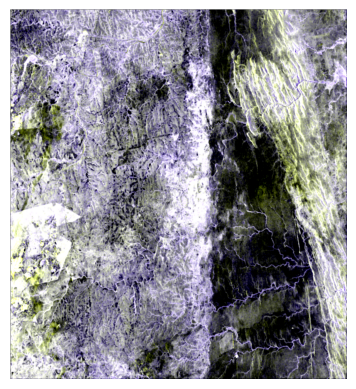

In [5]:
c2Folder =  os.path.join(inFile.split('.h5')[0],f"rlee_{window_size}x{window_size}",'C2HX')

# pst.utils.dxpRGB(c2Folder,type=1)
# pst.utils.dxpRGB(c2Folder,type=2)
# pst.utils.dxpRGB(c2Folder,type=3)
pst.dxpRGB(c2Folder,type=4)

#### 4. Generating some polarimetric parameters from C2 matrix

##### 4.1 Barakat Degree of polarization 
##### using `polsartools.dopdp` function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DOP_dp.html) or run `print(polsartools.dopdp.__.doc__)`


In [6]:

pst.dop_dp(c2Folder)


Progress:   0%|          | 0/4 [00:00<?, ?block/s]

Progress:  25%|██▌       | 1/4 [00:02<00:08,  2.68s/block]

Progress: 100%|██████████| 4/4 [00:02<00:00,  1.47block/s]

Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\dopdp.tif
Execution time for dop_dp: 3.00 seconds


##### Preview the output

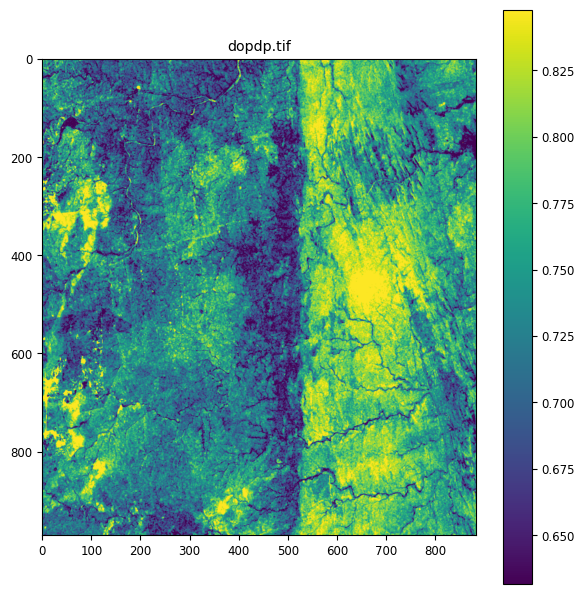

In [7]:

plot_images(c2Folder+'/dopdp.tif', lower_percentile=2, upper_percentile=98)

##### 4.2. Entropy-Alpha (H/α) parameters 
##### using **`polsartools.halphadp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halphadxp.html) or run `print(polsartools.halphadp.__.doc__)`


In [8]:
pst.halpha_dp(c2Folder)


Progress:   0%|          | 0/4 [00:00<?, ?block/s]

Progress:  25%|██▌       | 1/4 [00:06<00:18,  6.11s/block]

Progress:  50%|█████     | 2/4 [00:06<00:05,  2.65s/block]

Progress:  75%|███████▌  | 3/4 [00:07<00:01,  1.76s/block]

Progress: 100%|██████████| 4/4 [00:07<00:00,  1.19s/block]

Progress: 100%|██████████| 4/4 [00:07<00:00,  1.84s/block]

Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\Hdp.tif
Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\alphadp.tif
Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\e1_norm.tif


Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\e2_norm.tif
Execution time for halpha_dp: 8.00 seconds


##### Preview the output

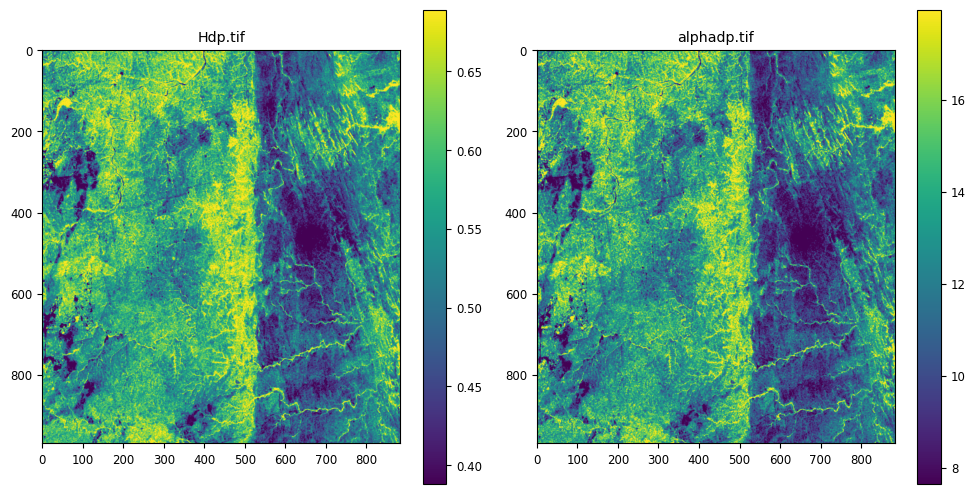

In [9]:


plot_images(c2Folder+'/Hdp.tif', 
            c2Folder + '/alphadp.tif',
            lower_percentile=2, upper_percentile=98)



##### Plot Entropy-Alpha plot for dual-pol
##### using **`polsartools.halpha_plot_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halpha_plot_dp.html) or run `print(polsartools.halpha_plot_dp.__.doc__)`

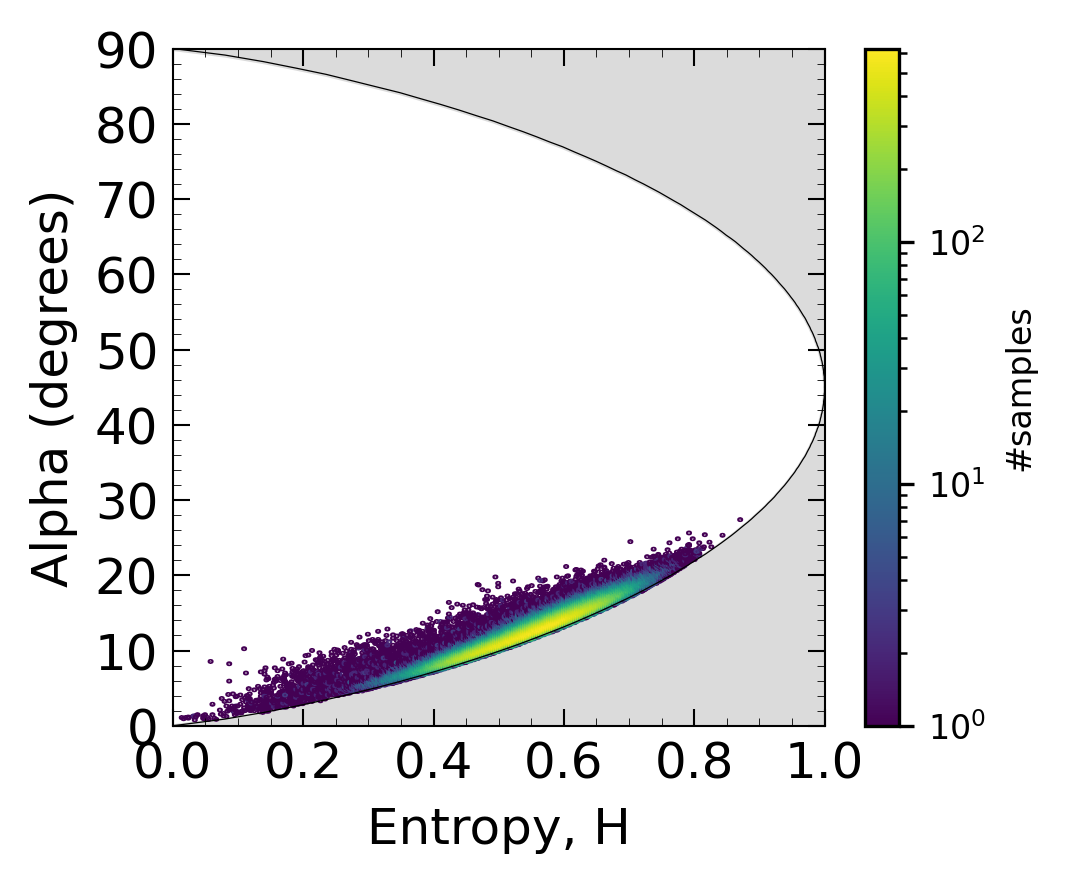

In [10]:
hFile = c2Folder + '/Hdp.tif'
alphaFile = c2Folder + '/alphadp.tif'

pst.halpha_plot_dp(hFile,alphaFile,norm='log')

##### 4.3. Shannon Entropy parameters (SE is the sum of contributions from intensity (SEI) and polarimetry (SEP))
##### using **`polsartools.shannon_h_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/shannon_h_dp.html) or run `print(polsartools.shannon_h_dp.__.doc__)`

In [11]:
pst.shannon_h_dp(c2Folder,win = 3)

Progress:   0%|          | 0/4 [00:00<?, ?block/s]

Progress:  25%|██▌       | 1/4 [00:06<00:19,  6.35s/block]

Progress:  50%|█████     | 2/4 [00:06<00:05,  2.87s/block]

Progress:  75%|███████▌  | 3/4 [00:07<00:01,  1.82s/block]

Progress: 100%|██████████| 4/4 [00:07<00:00,  1.26s/block]

Progress: 100%|██████████| 4/4 [00:07<00:00,  1.94s/block]

Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\H_Shannon.tif
Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\HI_Shannon.tif


Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\HP_Shannon.tif
Execution time for shannon_h_dp: 8.00 seconds


##### Preview the output

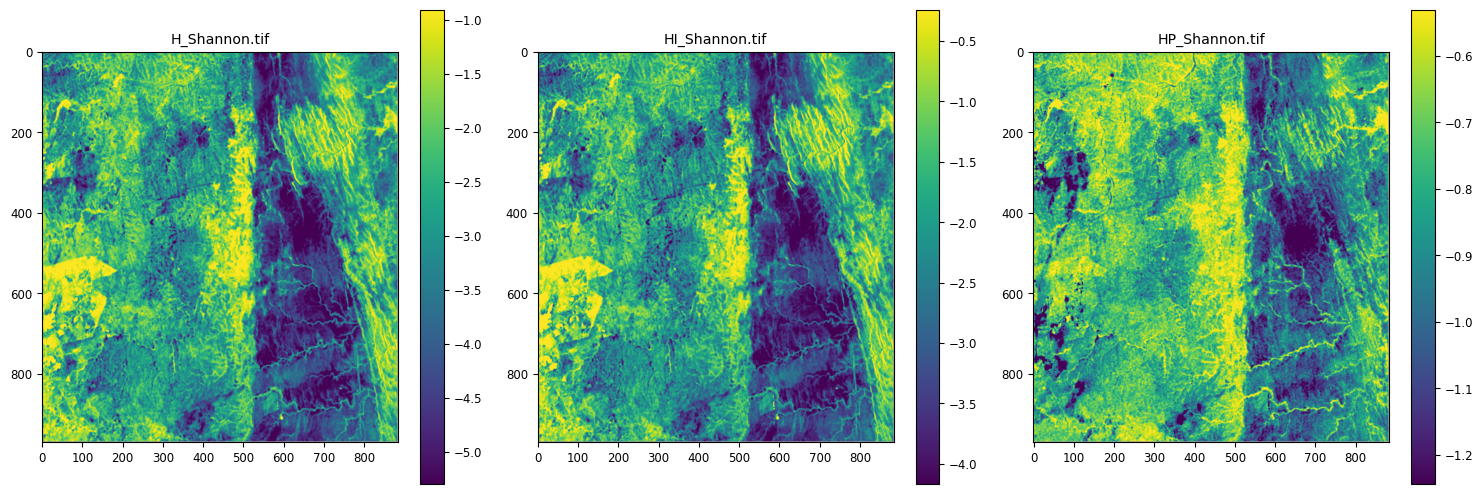

In [12]:

plot_images(c2Folder+'/H_Shannon.tif', 
            c2Folder + '/HI_Shannon.tif',
            c2Folder + '/HP_Shannon.tif',
            
            lower_percentile=2, upper_percentile=98)


##### 4.4. vegetation indices, Radar vegetation index (RVI), Dual-pol Radar Vegetation Index (DpRVI)

##### using **`polsartools.rvidp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/RVI_dp.html) or run `print(polsartools.rvidp.__.doc__)`

##### using **`polsartools.dprvi`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DpRVI.html) or run `print(polsartools.dprvi.__.doc__)`




In [13]:

pst.rvi_dp(c2Folder)

pst.dprvi(c2Folder)


Progress:   0%|          | 0/4 [00:00<?, ?block/s]

Progress:  25%|██▌       | 1/4 [00:02<00:08,  2.96s/block]

Progress: 100%|██████████| 4/4 [00:02<00:00,  1.35block/s]

Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\rvidp.tif
Execution time for rvi_dp: 3.00 seconds


Progress:   0%|          | 0/4 [00:00<?, ?block/s]

Progress:  25%|██▌       | 1/4 [00:02<00:08,  2.74s/block]

Progress: 100%|██████████| 4/4 [00:02<00:00,  1.45block/s]

Saved file ../data/NISAR/RSLC_DP\rlee_3x3\C2HX\dprvi.tif
Execution time for dprvi: 3.00 seconds


##### Preview the output

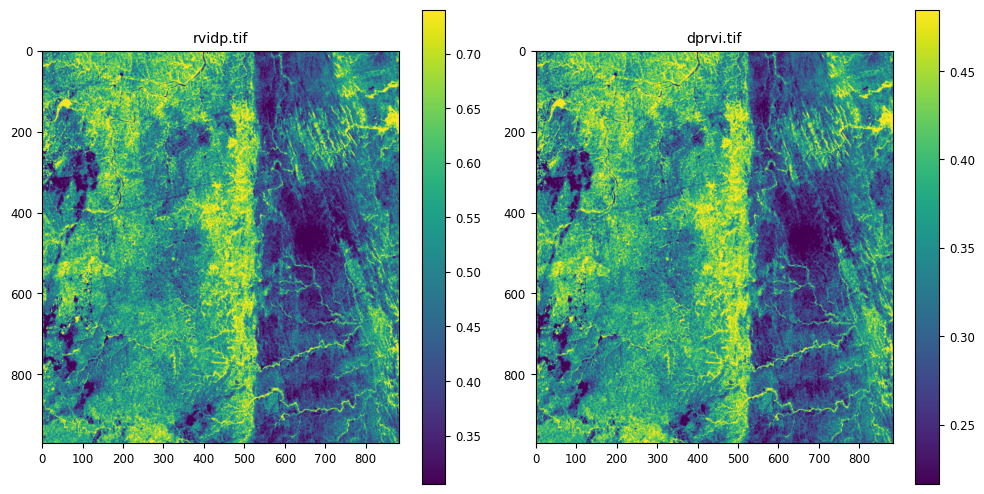

In [14]:

plot_images(c2Folder+'/rvidp.tif', 
            c2Folder + '/dprvi.tif',           
            lower_percentile=2, upper_percentile=98)
